Using TensorFlow backend.


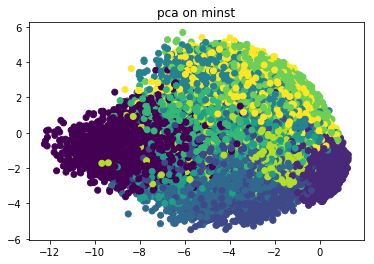

In [1]:
from numpy import mean
from numpy import cov
from numpy.linalg import eigh
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32') / 255.0


dims = 250

def pca(data):
    cova = cov(data.T) 
    values, vectors = eigh(cova)
    idx = np.argsort(values)[::-1]
    values = np.real(values[idx])
    vectors = np.real(vectors.T[idx])
    return values, vectors, cova

values, vectors, cova = pca(X_train)

P = X_train.dot(vectors[:dims].T)

plt.scatter(P[:, 0], P[:, 1],c=y_train)

plt.title("pca on minst")
plt.show()

In [4]:
images = np.dot(P, vectors[:dims])

In [5]:
images = images.reshape( -1, 28, 28)

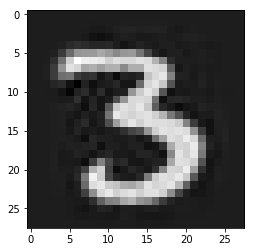

In [6]:
plt.imshow(images[12])
plt.gray()